In [27]:
from scikit_stan import GLM

import numpy as np
import pandas as pd  # type: ignore

import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
mpl.rc('axes.spines', top=True, bottom=True, left=True, right=True)
#mpl.rc('axes', facecolor='white')
mpl.rc("xtick", bottom=True, labelbottom=True)
mpl.rc("ytick", left=True, labelleft=True)
mpl.style.use('ggplot')


# center images
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage, .output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


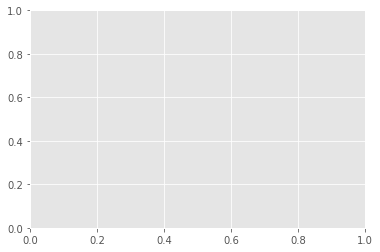

In [55]:
#fig, ax = plt.subplots() 

As a preliminary example of this package's functionality, we provide an example of performing a Gamma regression, which is used when the response variable is continuous and positive. We have adapted the following canonical example of a Gamma regression from McCullagh & Nelder (1989). 

Nine different percentage concentrations with prothrombin-free plasma ($u$) and clotting was induced via two lots of thromboplastin. Previous researchers had fitted a hyperbolic model, using an inverse transformation of the data for both lots $1$ and $2$ using untransformed data and we will analyze both lots using the inverse link and Gamma error. 

The following initial plots hint at using a log scale for $u$ to achieve inverse linearity, as well as the fact that the two lots have different regression and intercept coefficients. 

In [3]:
# ATTRIBUTION: McCullagh & Nelder (1989), chapter 8.4.2 p 301-302
bcdata_dict = {
    "u": np.array([5, 10, 15, 20, 30, 40, 60, 80, 100]),
    "lot1": np.array([118, 58, 42, 35, 27, 25, 21, 19, 18]),
    "lot2": np.array([69, 35, 26, 21, 18, 16, 13, 12, 12]),
}
bc_data_X = np.log(bcdata_dict["u"])
bc_data_lot1 = bcdata_dict["lot1"]
bc_data_lot2 = bcdata_dict["lot2"]

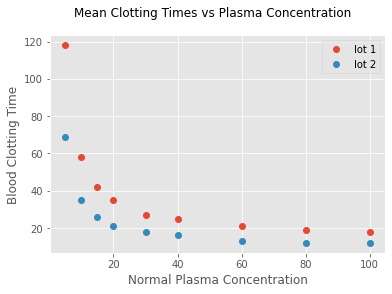

In [61]:
l1, = plt.plot(bcdata_dict["u"], bcdata_dict["lot1"], "o", label="lot 1")
l2, = plt.plot(bcdata_dict["u"], bcdata_dict["lot2"], "o", label="lot 2")

#.set_title("Mean Clotting Times vs Plasma Concentration")
#.set_xlabel('Normal Plasma Concentration')
#.set_ylabel('Blood Clotting Time')
plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')

#plt.set_xlabel('Normal Plasma Concentration')
plt.legend(handles=[l1, l2])
#fig.show()
#plt.show()

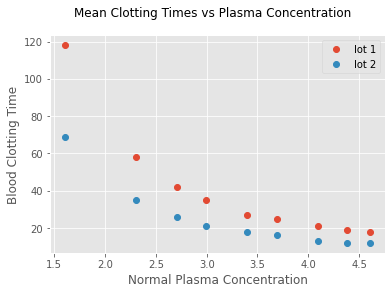

In [63]:
l1, = plt.plot(bc_data_X, bc_data_lot1, "o", label="lot 1")
l2, = plt.plot(bc_data_X, bc_data_lot2, "o", label="lot 2")

plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')


plt.legend(handles=[l1, l2])

After this preliminary data analysis, we fit two lines to the two lots of data. Using $x = \log u$, we fit a GLM to the data.

The original results were as follows, and we recreate regression coefficients within a standard deviation of these values: 

\begin{align}
    \text{lot 1:} \quad & \hat{\mu} ^{-1} = - 0.01655(\pm 0.00086) + 0.01534(\pm 0.00143)x \\
    \text{lot 2:} \quad & \hat{\mu} ^{-1} = - 0.02391(\pm 0.00038) + 0.02360(\pm 0.00062)x \\
\end{align}

As in previous work, we will fit two different linear models: one for each lot in the dataset. As usual, the $\alpha$ parameter is the regression intercept and $\mathbf{\beta}$ is vector of regression coefficients. In continuous models, the parameter $\sigma$ represents an auxiliary variable for the model. In this case, $\sigma$ is the shape parameter for the Gamma distribution. 

In [11]:
# Initialize two different GLM objects, one for each lot. 
glm_gamma1 = GLM(family="gamma", link="inverse", seed=1234)
glm_gamma2 = GLM(family="gamma", link="inverse", seed=1234)

# Fit the model. Note that default priors are used without autoscaling, see the 
# API to see how to change these.
glm_gamma1.fit(bc_data_X, bc_data_lot1, show_console=False)
glm_gamma2.fit(bc_data_X, bc_data_lot2, show_console=False)

print(glm_gamma1.alpha_, glm_gamma1.beta_)
print(glm_gamma2.alpha_, glm_gamma2.beta_)


13:51:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


13:51:32 - cmdstanpy - INFO - CmdStan done processing.
13:51:32 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 18 divergent transitions (1.8%)
	Chain 2 had 52 divergent transitions (5.2%)
	Chain 3 had 52 divergent transitions (5.2%)
	Chain 4 had 15 divergent transitions (1.5%)
	Use function "diagnose()" to see further information.


13:51:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


13:51:33 - cmdstanpy - INFO - CmdStan done processing.
13:51:33 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (1.4%)
	Chain 2 had 11 divergent transitions (1.1%)
	Chain 3 had 11 divergent transitions (1.1%)
	Chain 4 had 18 divergent transitions (1.8%)
	Use function "diagnose()" to see further information.



-0.0143744886023409 [0.01511054]
-0.02016699577889755 [0.02300954]


As can be seen above, the fitted model has the following parameters, which are within one standard deviation of the results from past studies.

\begin{align}
    \text{lot 1:} \quad & \hat{\mu} ^{-1} = - 0.01437 + 0.01511 \cdot x \\
    \text{lot 2:} \quad & \hat{\mu} ^{-1} = - 0.02016 + 0.02301 \cdot x \\
\end{align}

As a verification of the accuracy of the fitted model, we can plot the fitted lines and the data.

In [12]:
mu_inv1 = 1 /( glm_gamma1.alpha_ + glm_gamma1.beta_ * bc_data_X)
mu_inv2 = 1 /( glm_gamma2.alpha_ + glm_gamma2.beta_ * bc_data_X)

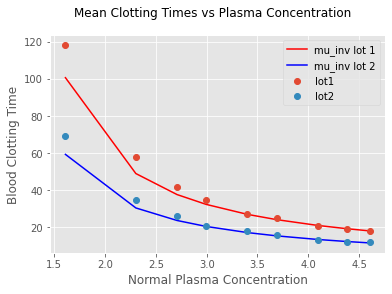

In [64]:
mlot1, = plt.plot(bc_data_X, mu_inv1, "r", label="mu_inv lot 1")
mlot2, = plt.plot(bc_data_X, mu_inv2, "b", label="mu_inv lot 2")
l1, = plt.plot(bc_data_X, bc_data_lot1, "o", label="lot1")
l2, = plt.plot(bc_data_X, bc_data_lot2, "o", label="lot2")

plt.suptitle("Mean Clotting Times vs Plasma Concentration")
plt.xlabel('Normal Plasma Concentration')
plt.ylabel('Blood Clotting Time')

plt.legend(handles=[mlot1, mlot2, l1, l2])


As this package is a wrapper around CmdStanPy, we can gather additional statistics about the fitted model with methods from that package. In particular, we can consider further statistics about the model by using CmdStanPy's summary method on the results of the fit. 

Notice that $\mu$ ("mu") and the link-inverted $\mu$ ("mu unlinked") are included as part of the model summary. 

In [15]:
glm_gamma1.fitted_samples_.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-37.872000,0.058502,1.450170,-40.644700,-37.484200,-36.299900,614.47000,752.10500,1.001210
alpha,-0.014375,0.000313,0.010033,-0.029681,-0.014978,0.003167,1025.39000,1255.06000,1.000050
beta[1],0.015111,0.000137,0.004426,0.008133,0.014924,0.022575,1037.50000,1269.90000,1.000100
sigma,4.583270,0.080310,2.202400,1.688160,4.215180,8.792770,751.98932,920.42756,1.001550
mu[1],0.009945,0.000121,0.004391,0.004156,0.009199,0.018248,1314.44000,1608.87000,0.999679
mu[2],0.020419,0.000093,0.003937,0.014795,0.019962,0.027467,1774.18000,2171.58000,0.999482
mu[3],0.026546,0.000119,0.004692,0.019800,0.026167,0.034658,1554.82000,1903.08000,0.999627
mu[4],0.030893,0.000147,0.005526,0.022989,0.030372,0.040608,1414.52000,1731.36000,0.999739
mu[5],0.037019,0.000193,0.006932,0.026874,0.036312,0.049145,1284.99000,1572.81000,0.999854


In [16]:
glm_gamma2.fitted_samples_.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-33.509900,0.043156,1.350310,-36.268900,-33.150100,-32.050000,979.0120,1155.86000,1.00324
alpha,-0.020167,0.000555,0.016016,-0.043106,-0.021458,0.008207,833.9970,984.64800,1.00393
beta[1],0.023009,0.000228,0.006724,0.011853,0.023072,0.033798,870.6130,1027.88000,1.00273
sigma,4.704980,0.055470,2.134540,1.900200,4.329400,8.820230,1480.8454,1748.34168,1.00020
mu[1],0.016865,0.000213,0.007361,0.007052,0.015832,0.029846,1198.3400,1414.81000,1.00396
mu[2],0.032814,0.000125,0.006261,0.023793,0.032257,0.043709,2520.4400,2975.73000,1.00177
mu[3],0.042144,0.000141,0.007112,0.031587,0.041578,0.054351,2538.7500,2997.34000,1.00078
mu[4],0.048763,0.000185,0.008226,0.036422,0.048187,0.062883,1968.6500,2324.26000,1.00064
mu[5],0.058093,0.000264,0.010220,0.042274,0.057353,0.075576,1497.5700,1768.08000,1.00079


Additional information about the model and various visualizations can be revealed by Arviz, which seamlessly integrates with CmdStanPy components. Consider the following.  

In [76]:
import arviz as az
az.style.use("arviz-darkgrid")

In [77]:
infdata = az.from_cmdstanpy(glm_gamma1.fitted_samples_)
infdata

Inference data with groups:
	> posterior
	> sample_stats

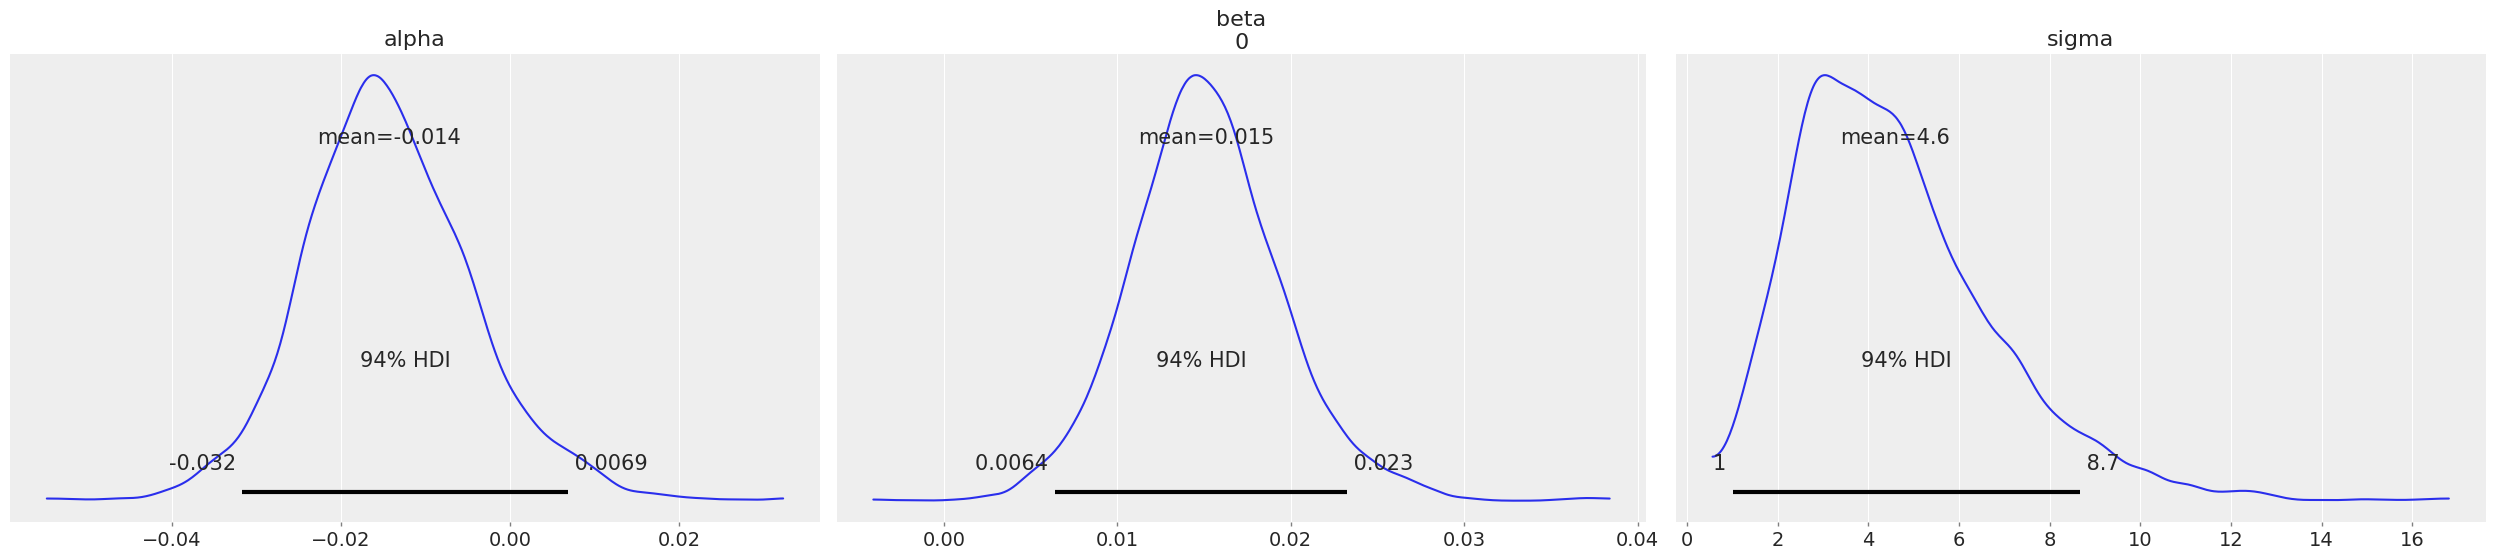

In [78]:
az.plot_posterior(infdata, var_names=['alpha', 'beta', 'sigma']);

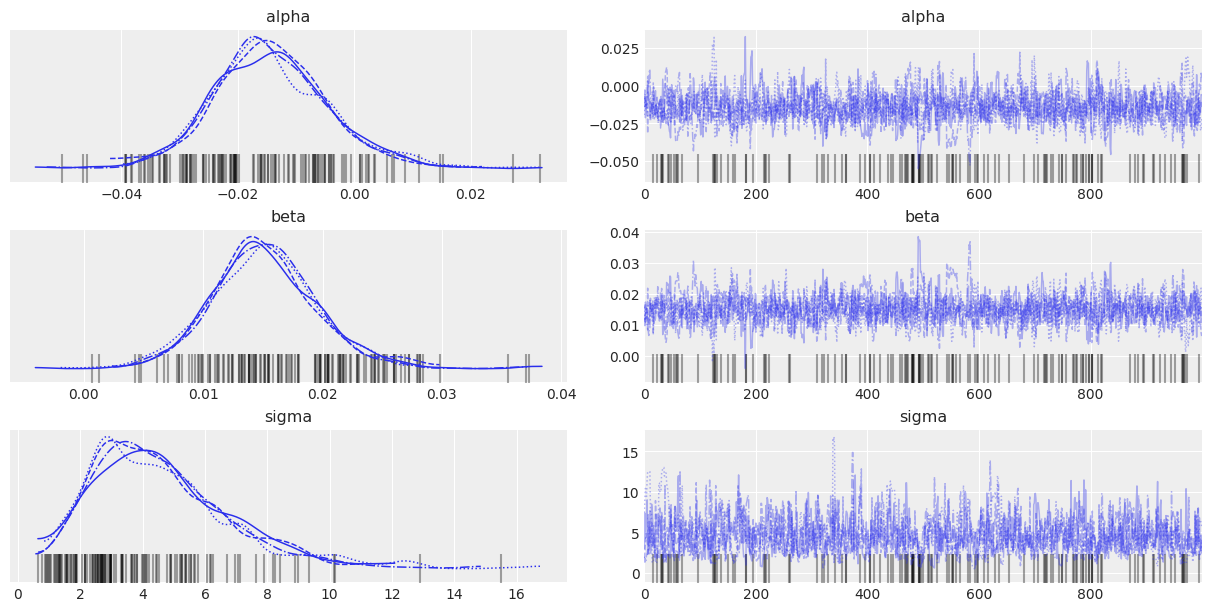

In [79]:
az.plot_trace(infdata, var_names=['alpha', 'beta', 'sigma'], compact=True);